In [28]:
import pathlib

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import shap

import re

In [29]:
datav1 = pd.read_csv("data/fullData.csv")
datav1.describe()

year  total_share_capital  total_reserves_and_surplus  \
count  14464.000000         14464.000000                14464.000000   
mean      13.019566            35.176453                   96.254234   
std        1.412390            83.229832                  199.972135   
min       11.000000             0.000000                 -966.080000   
25%       12.000000             5.290000                    0.000000   
50%       13.000000            11.580000                   16.340000   
75%       14.000000            27.075000                  109.475000   
max       15.000000           971.410000                  999.350000   

       total_shareholders_funds  long_term_borrowings  \
count              14464.000000          14464.000000   
mean                 111.897362             56.346927   
std                  199.717617            140.274888   
min                 -975.460000             -0.720000   
25%                    4.247500              0.000000   
50%                   28.375000              2.850000   
75%                  130.120000             35.070000   
max                  999.410000            998.630000   

       deferred_tax_liabilities_net  other_long_term_liabilities  \
count                  14464.000000                 14464.000000   
mean                      15.775868                    13.304009   
std                       65.088068                    66.414933   
min                     -232.250000                     0.000000   
25%                        0.000000                     0.000000   
50%                        0.190000                     0.000000   
75%                        4.960000                     1.440000   
max                      979.700000                   989.930000   

       long_term_provisions  total_non.current_liabilities  \
count          14464.000000                   14464.000000   
mean               8.564404                      69.263476   
std               46.568307                     152.330433   
min               -0.750000                      -2.290000   
25%                0.000000                       0.480000   
50%                0.140000                       8.035000   
75%                1.710000                      54.595000   
max              958.040000                     999.260000   

       short_term_borrowings  ...     EPS_basic   EPS_diluted  dividendEquity  \
count           14464.000000  ...  14464.000000  14464.000000    14464.000000   
mean               61.168352  ...      6.888827      6.882536       11.688197   
std               136.265926  ...     34.265109     33.969836       58.746833   
min                -8.840000  ...   -872.000000   -872.000000        0.000000   
25%                 0.000000  ...      0.000000      0.000000        0.000000   
50%                 7.290000  ...      1.000000      1.000000        0.000000   
75%                49.310000  ...      8.000000      8.000000        2.020000   
max               998.810000  ...    797.000000    797.000000      991.300000   

        taxDividend  net_cashflow_from_operating_activities  \
count  14464.000000                            14464.000000   
mean       4.018572                               32.864374   
std       32.632849                              126.800325   
min       -9.300000                             -995.620000   
25%        0.000000                               -0.280000   
50%        0.000000                                2.180000   
75%        0.360000                               25.947500   
max      810.990000                              998.440000   

       net_cash_used_in_investing_activities  \
count                           14464.000000   
mean                              -30.497678   
std                               120.836056   
min                              -997.950000   
25%                               -17.912500   
50%                                -1.410000   
75%                                 0.000000  

In [30]:
datav1.head()

category company  year  total_share_capital  total_reserves_and_surplus  \
0  chemicals     A01    15                  7.0                       10.17   
1  chemicals     A01    14                  7.0                        8.41   
2  chemicals     A01    13                  7.0                        7.44   
3  chemicals     A01    12                  7.0                        6.66   
4  chemicals     A01    11                  7.0                        5.34   

   total_shareholders_funds  long_term_borrowings  \
0                     17.17                   0.0   
1                     15.41                   0.0   
2                     14.44                   0.0   
3                     13.66                   0.0   
4                     12.34                   0.0   

   deferred_tax_liabilities_net  other_long_term_liabilities  \
0                         -0.12                          0.0   
1                          0.48                          0.0   
2                          0.63                          0.0   
3                          0.82                          0.0   
4                          0.93                          0.0   

   long_term_provisions  ...  EPS_diluted  dividendEquity  taxDividend  \
0                  0.47  ...            4             0.0          0.0   
1                  0.40  ...            1             0.0          0.0   
2                  0.41  ...            1             0.0          0.0   
3                  0.34  ...            2             0.0          0.0   
4                  0.42  ...           -1             0.0          0.0   

   net_cashflow_from_operating_activities  \
0                                    0.00   
1                                    1.08   
2                                    0.09   
3                                    1.77   
4                                    1.48   

   net_cash_used_in_investing_activities  \
0                                   0.00   
1                                  -0.87   
2                                  -0.82   
3                                  -1.67   
4                                  -1.11   

   net_cash_used_from_financing_activities  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   net_inc.dec_in_cash_and_cash_equivalents  cash_and_equivalents_year_begin  \
0                                      0.00                             0.00   
1                                      0.21                             2.96   
2                                     -0.73                             3.68   
3                                      0.10                             3.58   
4                                      0.37                             3.21   

   cash_and_equivalents_year_end  fraud  
0                           0.00     no  
1                           3.17     no  
2                           2.96     no  
3                           3.68     no  
4                           3.58     no  

[5 rows x 78 columns]

In [31]:
le = LabelEncoder()
y1 = le.fit_transform(datav1['category'])
y2 = le.fit_transform(datav1['company'])

datav2 = datav1.copy()
datav2['category'] = y1
datav2['company'] = y2
datav2.replace('yes',1,inplace = True)
datav2.replace('no',0,inplace = True)
datav2.head()
datav2.describe()

category       company          year  total_share_capital  \
count  14464.000000  14464.000000  14464.000000         14464.000000   
mean      52.409223   1471.465846     13.019566            35.176453   
std       28.036065    850.762202      1.412390            83.229832   
min        0.000000      0.000000     11.000000             0.000000   
25%       26.000000    734.000000     12.000000             5.290000   
50%       57.000000   1471.000000     13.000000            11.580000   
75%       69.000000   2209.250000     14.000000            27.075000   
max      105.000000   2942.000000     15.000000           971.410000   

       total_reserves_and_surplus  total_shareholders_funds  \
count                14464.000000              14464.000000   
mean                    96.254234                111.897362   
std                    199.972135                199.717617   
min                   -966.080000               -975.460000   
25%                      0.000000                  4.247500   
50%                     16.340000                 28.375000   
75%                    109.475000                130.120000   
max                    999.350000                999.410000   

       long_term_borrowings  deferred_tax_liabilities_net  \
count          14464.000000                  14464.000000   
mean              56.346927                     15.775868   
std              140.274888                     65.088068   
min               -0.720000                   -232.250000   
25%                0.000000                      0.000000   
50%                2.850000                      0.190000   
75%               35.070000                      4.960000   
max              998.630000                    979.700000   

       other_long_term_liabilities  long_term_provisions  ...   EPS_diluted  \
count                 14464.000000          14464.000000  ...  14464.000000   
mean                     13.304009              8.564404  ...      6.882536   
std                      66.414933             46.568307  ...     33.969836   
min                       0.000000             -0.750000  ...   -872.000000   
25%                       0.000000              0.000000  ...      0.000000   
50%                       0.000000              0.140000  ...      1.000000   
75%                       1.440000              1.710000  ...      8.000000   
max                     989.930000            958.040000  ...    797.000000   

       dividendEquity   taxDividend  net_cashflow_from_operating_activities  \
count    14464.000000  14464.000000                            14464.000000   
mean        11.688197      4.018572                               32.864374   
std         58.746833     32.632849                              126.800325   
min          0.000000     -9.300000                             -995.620000   
25%          0.000000      0.000000                               -0.280000   
50%          0.000000      0.000000                                2.180000   
75%          2.020000      0.360000                               25.947500   
max        991.300000    810.990000                              998.440000   

       net_cash_used_in_investing_activities  \
count                           14464.000000   
mean                              -30.497678   
std                               120.836056   
min                              -997.950000   
25%                               -17.912500   
50%                                -1.410000   
75%                                 0.000000   
max                               991.500000   

       net_cash_used_from_financing_activities  \
count                             14464.000000   
mean                                 -5.073590   
std                                 127.830066   
min                                -998.310000   
25%                                  -9.095000   
50%                                  -0.030000   
75%                                  

In [32]:
datav3 = datav2.loc[datav2['fraud'] == 1]
temp = datav2.sample(n = 676,random_state=1)
datav3 = pd.concat([datav3,temp])
datav3 = datav3.reset_index(drop = True)
datav3 = (datav3 - datav3.min()) / (datav3.max() - datav3.min())
datav3.to_csv("StdData.csv",index = False)
datav3

category   company  year  total_share_capital  \
0    0.807692  0.000000  0.25             0.006151   
1    0.807692  0.000000  0.00             0.006151   
2    0.538462  0.002043  1.00             0.017124   
3    0.538462  0.002043  0.75             0.017235   
4    0.538462  0.005448  1.00             0.002399   
..        ...       ...   ...                  ...   
995  0.096154  0.255363  0.75             0.037632   
996  0.538462  0.876404  1.00             0.005622   
997  0.250000  0.512768  0.25             0.015390   
998  0.826923  0.559074  0.50             0.031887   
999  0.346154  0.090228  1.00             0.018736   

     total_reserves_and_surplus  total_shareholders_funds  \
0                      0.503181                  0.514880   
1                      0.502815                  0.514515   
2                      0.508972                  0.525238   
3                      0.519996                  0.536275   
4                      0.496654                  0.506803   
..                          ...                       ...   
995                    0.492043                  0.501202   
996                    0.496994                  0.508488   
997                    0.520352                  0.535864   
998                    0.865146                  0.886643   
999                    0.583985                  0.600728   

     long_term_borrowings  deferred_tax_liabilities_net  \
0                0.009463                      0.002110   
1                0.010349                      0.002110   
2                0.701182                      0.007299   
3                0.772071                      0.006586   
4                0.019419                      0.001876   
..                    ...                           ...   
995              0.127534                      0.031970   
996              0.000000                      0.001876   
997              0.017838                      0.002691   
998              0.136514                      0.027587   
999              0.000000                      0.006321   

     other_long_term_liabilities  long_term_provisions  ...  EPS_diluted  \
0                       0.000276              0.002453  ...     0.332168   
1                       0.000138              0.002686  ...     0.333916   
2                       0.004175              0.003324  ...     0.304196   
3                       0.003718              0.003042  ...     0.351399   
4                       0.000000              0.000000  ...     0.293706   
..                           ...                   ...  ...          ...   
995                     0.001902              0.004330  ...     0.354895   
996                     0.000000              0.000025  ...     0.330420   
997                     0.000000              0.000135  ...     0.340909   
998                     0.002688              0.024951  ...     0.360140   
999                     0.000000              0.001779  ...     0.333916   

     dividendEquity  taxDividend  net_cashflow_from_operating_activities  \
0          0.000000     0.000146                                0.475849   
1          0.000000     0.000146                                0.478036   
2          0.000000     0.000146                                0.419876   
3          0.001392     0.000520                                0.340512   
4          0.000000     0.000146                                0.481151   
..              ...          ...                                     ...   
995        0.025049     0.006910                                0.598552   
996        0.000000     0.000146                                0.477836   
997        0.001535     0.000537                                0.491961   
998        0.006633     0.001935                                0.489590   
999        0.007790     0.002650                                0.485730   

     net_cash_used_in_investing_activities  \
0                                 0.525194

In [33]:
train_data, test_data = train_test_split(datav3, test_size=0.2)
train_labels = train_data.pop('fraud')
test_labels = test_data.pop('fraud')

In [34]:
model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_data.keys())]),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(2)
    ])

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [36]:
history = model.fit(train_data, train_labels, epochs=500)

Epoch 1/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.6900
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.7825
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.7925
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.7912
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.7837
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.3733 - accuracy: 0.8288
Epoch 7/500
25/25 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8400
Epoch 8/500
25/25 [==============================] - 0s 1ms/step - loss: 0.3567 - accuracy: 0.8300
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 0.3379 - accuracy: 0.8512
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8388
Epoch 11/

In [37]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  accuracy  epoch
495  0.045040   0.98125    495
496  0.033537   0.98375    496
497  0.026244   0.98750    497
498  0.023185   0.98875    498
499  0.030095   0.98625    499

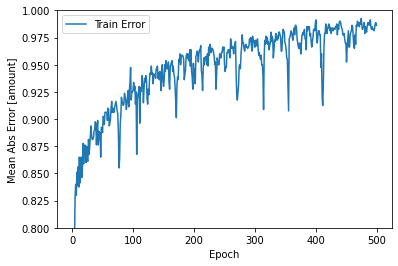

In [38]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [amount]')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Error')
    plt.ylim([0.8,1])
    plt.legend()

    plt.show()


plot_history(history)

In [39]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [40]:
predictions = probability_model.predict(test_data)

In [41]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

7/7 - 0s - loss: 2.0029 - accuracy: 0.8050 - 80ms/epoch - 11ms/step

Test accuracy: 0.8050000071525574


In [42]:
predictions[2]

array([1.0000000e+00, 1.5985534e-11], dtype=float32)

In [43]:
test_labels

320    1.0
190    1.0
841    0.0
599    0.0
969    0.0
      ... 
976    0.0
98     1.0
556    0.0
337    0.0
157    1.0
Name: fraud, Length: 200, dtype: float64

In [44]:
def plot_value_array(i, predictions_array, true_label):
      predictions_array, true_label = predictions_array, true_label[i]
      plt.grid(False)
      plt.xticks(range(2))
      plt.yticks([])
      thisplot = plt.bar(range(2), predictions_array, color="#777777")
      plt.ylim([0, 1])
      predicted_label = np.argmax(predictions_array)

      thisplot[predicted_label].set_color('red')
      thisplot[int(true_label)].set_color('blue')

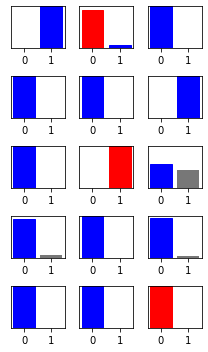

In [45]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(num_cols, num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_value_array(i, predictions[i], list(test_labels))
plt.tight_layout()
plt.show()

In [46]:
predictions_train = probability_model.predict(train_data)
predictions_test = probability_model.predict(test_data)

Result_train = pd.DataFrame(train_labels)
Result_test = pd.DataFrame(test_labels)

Result_train['prediction'] = predictions_train.tolist()
Result_test['prediction'] = predictions_test.tolist()

Result_train['myfraud'] = Result_train['prediction'].apply(lambda x: 0 if x[0]>x[1] else 1)
Result_test['myfraud'] = Result_test['prediction'].apply(lambda x: 0 if x[0]>x[1] else 1)


Result_train.reset_index(drop = True)
Result_test.reset_index(drop = True)

fraud                                   prediction  myfraud
0      1.0                 [4.409142391961779e-16, 1.0]        1
1      1.0    [0.9161936044692993, 0.08380639553070068]        0
2      0.0                [1.0, 1.5985534077000985e-11]        0
3      0.0                                   [1.0, 0.0]        0
4      0.0                 [1.0, 3.578676962865983e-24]        0
..     ...                                          ...      ...
195    0.0  [0.999988317489624, 1.1731303857231978e-05]        0
196    1.0   [0.012376782484352589, 0.9876232147216797]        1
197    0.0                 [1.0, 4.496629807057037e-19]        0
198    0.0                 [1.0, 3.196559683615874e-11]        0
199    1.0      [0.568612277507782, 0.4313878118991852]        0

[200 rows x 3 columns]

In [47]:
train_fraud = list(Result_train['fraud'])
train_myfraud = list(Result_train['myfraud'])

TP = tf.keras.metrics.TruePositives()
TP.update_state(train_fraud,train_myfraud)
train_TP = TP.result().numpy()

TN = tf.keras.metrics.TrueNegatives()
TN.update_state(train_fraud,train_myfraud)
train_TN = TN.result().numpy()

FP = tf.keras.metrics.FalsePositives()
FP.update_state(train_fraud,train_myfraud)
train_FP = FP.result().numpy()

FN = tf.keras.metrics.FalseNegatives()
FN.update_state(train_fraud,train_myfraud)
train_FN = FN.result().numpy()

print("train_prediction : ","TP: ",train_TP,"TN: ",train_TN,"FP: ",train_FP,"FN: ",train_FN)

train_prediction :  TP:  272.0 TN:  517.0 FP:  1.0 FN:  10.0


In [48]:
test_fraud = list(Result_test['fraud'])
test_myfraud = list(Result_test['myfraud'])

TP = tf.keras.metrics.TruePositives()
TP.update_state(test_fraud,test_myfraud)
test_TP = TP.result().numpy()

TN = tf.keras.metrics.TrueNegatives()
TN.update_state(test_fraud,test_myfraud)
test_TN = TN.result().numpy()

FP = tf.keras.metrics.FalsePositives()
FP.update_state(test_fraud,test_myfraud)
test_FP = FP.result().numpy()

FN = tf.keras.metrics.FalseNegatives()
FN.update_state(test_fraud,test_myfraud)
test_FN = FN.result().numpy()

print("test_prediction : ","TP: ",test_TP,"TN: ",test_TN,"FP: ",test_FP,"FN: ",test_FN)

test_prediction :  TP:  37.0 TN:  124.0 FP:  20.0 FN:  19.0


In [49]:
train_data.reset_index(drop = True,inplace=True)
test_data.reset_index(drop = True,inplace=True)

In [50]:
shap.initjs() #初始化JS
explainer = shap.KernelExplainer(model,train_data.iloc[0:10])

In [51]:
shap_values = explainer.shap_values(train_data, nsamples=100)

  0%|          | 0/800 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC(

In [52]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], train_data.iloc[0,:])

In [53]:
shap.force_plot(explainer.expected_value[0], shap_values[0], train_data)

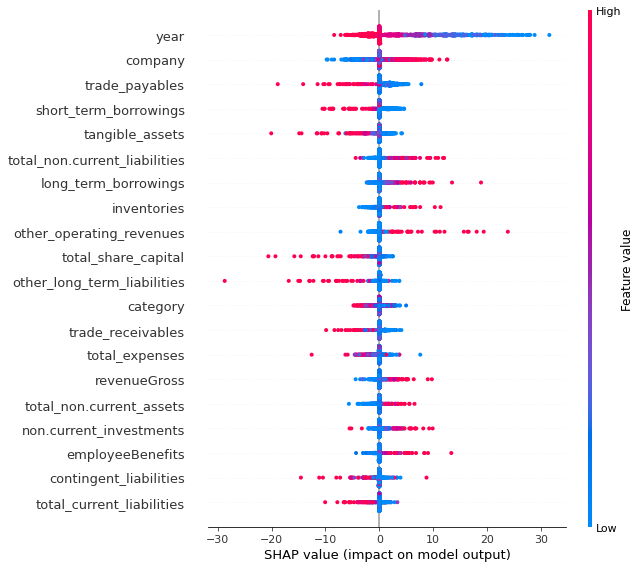

In [54]:
shap.summary_plot(shap_values[0], train_data)

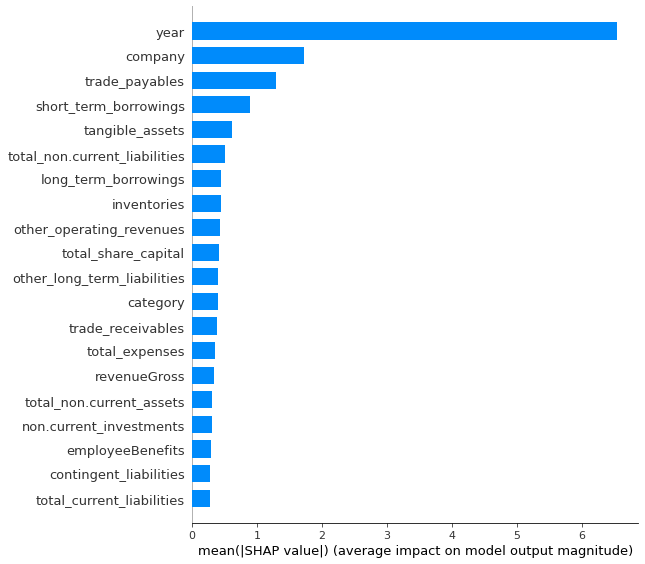

In [55]:
shap.summary_plot(shap_values[0], train_data, plot_type="bar")

In [56]:
# Gdp数据：增长率，和占世界比例----来自世界银行
Gdp = [5.24,5.46,6.39,7.41,8.00]
Gdp_world = [2.481,2.4312,2.401,2.5659,2.7961]
datav4 = pd.read_csv("data/fullData.csv")

In [57]:
datav4['Gdp'] = datav4['year'].apply(lambda x:Gdp[x-11])
datav4['Gdp_world'] = datav4['year'].apply(lambda x:Gdp_world[x-11])
datav4.head()

category company  year  total_share_capital  total_reserves_and_surplus  \
0  chemicals     A01    15                  7.0                       10.17   
1  chemicals     A01    14                  7.0                        8.41   
2  chemicals     A01    13                  7.0                        7.44   
3  chemicals     A01    12                  7.0                        6.66   
4  chemicals     A01    11                  7.0                        5.34   

   total_shareholders_funds  long_term_borrowings  \
0                     17.17                   0.0   
1                     15.41                   0.0   
2                     14.44                   0.0   
3                     13.66                   0.0   
4                     12.34                   0.0   

   deferred_tax_liabilities_net  other_long_term_liabilities  \
0                         -0.12                          0.0   
1                          0.48                          0.0   
2                          0.63                          0.0   
3                          0.82                          0.0   
4                          0.93                          0.0   

   long_term_provisions  ...  taxDividend  \
0                  0.47  ...          0.0   
1                  0.40  ...          0.0   
2                  0.41  ...          0.0   
3                  0.34  ...          0.0   
4                  0.42  ...          0.0   

   net_cashflow_from_operating_activities  \
0                                    0.00   
1                                    1.08   
2                                    0.09   
3                                    1.77   
4                                    1.48   

   net_cash_used_in_investing_activities  \
0                                   0.00   
1                                  -0.87   
2                                  -0.82   
3                                  -1.67   
4                                  -1.11   

   net_cash_used_from_financing_activities  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   net_inc.dec_in_cash_and_cash_equivalents  cash_and_equivalents_year_begin  \
0                                      0.00                             0.00   
1                                      0.21                             2.96   
2                                     -0.73                             3.68   
3                                      0.10                             3.58   
4                                      0.37                             3.21   

   cash_and_equivalents_year_end  fraud   Gdp  Gdp_world  
0                           0.00     no  8.00     2.7961  
1                           3.17     no  7.41     2.5659  
2                           2.96     no  6.39     2.4010  
3                           3.68     no  5.46     2.4312  
4                           3.58     no  5.24     2.4810  

[5 rows x 80 columns]

In [58]:
# 独热编码
dummies = pd.get_dummies(datav4['category'],prefix='category')
datav5 = datav4.join(dummies)
datav5.replace('yes',1,inplace = True)
datav5.replace('no',0,inplace = True)
datav5.drop(['category','company','year'], axis = 1,inplace=True)
datav5.head()

total_share_capital  total_reserves_and_surplus  total_shareholders_funds  \
0                  7.0                       10.17                     17.17   
1                  7.0                        8.41                     15.41   
2                  7.0                        7.44                     14.44   
3                  7.0                        6.66                     13.66   
4                  7.0                        5.34                     12.34   

   long_term_borrowings  deferred_tax_liabilities_net  \
0                   0.0                         -0.12   
1                   0.0                          0.48   
2                   0.0                          0.63   
3                   0.0                          0.82   
4                   0.0                          0.93   

   other_long_term_liabilities  long_term_provisions  \
0                          0.0                  0.47   
1                          0.0                  0.40   
2                          0.0                  0.41   
3                          0.0                  0.34   
4                          0.0                  0.42   

   total_non.current_liabilities  short_term_borrowings  trade_payables  ...  \
0                           0.34                    0.0            2.91  ...   
1                           0.88                    0.0            1.87  ...   
2                           1.04                    0.0            1.63  ...   
3                           1.16                    0.0            0.85  ...   
4                           1.35                    0.0            1.16  ...   

   category_textilesspinningcottonblended  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   category_textilesspinningsyntheticblended  category_textilessyntheticsilk  \
0                                          0                               0   
1                                          0                               0   
2                                          0                               0   
3                                          0                               0   
4                                          0                               0   

   category_textilesterrytowels  category_textilesweaving  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   category_textileswoollenworsted  category_trading  \
0                                0                 0   
1                                0                 0   
2                                0                 0   
3                                0                 0   
4                                0                 0   

   category_transportlogistics  category_tyres  category_vanaspatioils  
0                            0               0                       0  
1                            0               0                       0  
2                            0               0                       0  
3                            0               0                       0  
4                            0               0                       0  

[5 rows x 183 columns]

In [59]:
datav6 = datav5.loc[datav5['fraud'] == 1]
temp = datav5.sample(n = 676,random_state=1)
datav6 = pd.concat([datav6,temp])
datav6 = datav6.reset_index(drop = True)
datav6 = (datav6 - datav6.min()) / (datav6.max() - datav6.min())
datav6.fillna(0,inplace=True)
datav6.describe()

total_share_capital  total_reserves_and_surplus  \
count          1000.000000                 1000.000000   
mean              0.058405                    0.533129   
std               0.125713                    0.114738   
min               0.000000                    0.000000   
25%               0.007317                    0.492043   
50%               0.016755                    0.497113   
75%               0.048371                    0.544037   
max               1.000000                    1.000000   

       total_shareholders_funds  long_term_borrowings  \
count               1000.000000           1000.000000   
mean                   0.552015              0.072897   
std                    0.110782              0.165196   
min                    0.000000              0.000000   
25%                    0.501308              0.000000   
50%                    0.511890              0.002753   
75%                    0.564157              0.046734   
max                    1.000000              1.000000   

       deferred_tax_liabilities_net  other_long_term_liabilities  \
count                   1000.000000                  1000.000000   
mean                       0.019400                     0.021224   
std                        0.075188                     0.095158   
min                        0.000000                     0.000000   
25%                        0.001876                     0.000000   
50%                        0.001876                     0.000000   
75%                        0.006267                     0.002135   
max                        1.000000                     1.000000   

       long_term_provisions  total_non.current_liabilities  \
count           1000.000000                    1000.000000   
mean               0.014753                       0.086074   
std                0.063765                       0.175852   
min                0.000000                       0.000000   
25%                0.000000                       0.001995   
50%                0.000368                       0.009880   
75%                0.003033                       0.072464   
max                1.000000                       1.000000   

       short_term_borrowings  trade_payables  ...  \
count            1000.000000     1000.000000  ...   
mean                0.077164        0.071850  ...   
std                 0.161223        0.148679  ...   
min                 0.000000        0.000000  ...   
25%                 0.000000        0.000881  ...   
50%                 0.009007        0.011801  ...   
75%                 0.062291        0.060108  ...   
max                 1.000000        1.000000  ...   

       category_textilesspinningcottonblended  \
count                             1000.000000   
mean                                 0.017000   
std                                  0.129336   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       category_textilesspinningsyntheticblended  \
count                                1000.000000   
mean                                    0.008000   
std                                     0.089129   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     0.000000   
max                                     1.000000   

       category_textilessyntheticsilk  category_textilesterrytowels  \
count                     1000.000000                        1000.0   
mean                         0.002000                           0.0   
std                          0.044699                           0.0   
min                          0.000000                           0.0   
25%                          0.000000                 

In [60]:
train_data, test_data = train_test_split(datav6, test_size=0.2)
train_labels = train_data.pop('fraud')
test_labels = test_data.pop('fraud')
train_data

total_share_capital  total_reserves_and_surplus  \
413             0.000935                    0.497803   
656             0.004687                    0.491338   
441             0.000000                    0.492043   
205             0.005905                    0.492734   
44              0.006778                    0.499390   
..                   ...                         ...   
381             0.038161                    0.533447   
591             0.018231                    0.819729   
812             0.002436                    0.493202   
12              0.377719                    0.127704   
677             0.003826                    0.500286   

     total_shareholders_funds  long_term_borrowings  \
413                  0.507337              0.000091   
656                  0.502461              0.000000   
441                  0.501202              0.000000   
205                  0.504357              0.030492   
44                   0.511360              0.043297   
..                        ...                   ...   
381                  0.558436              0.004470   
591                  0.835637              0.225966   
812                  0.503376              0.004399   
12                   0.295580              0.701907   
677                  0.511021              0.001188   

     deferred_tax_liabilities_net  other_long_term_liabilities  \
413                      0.001876                     0.000000   
656                      0.001876                     0.000000   
441                      1.000000                     0.000000   
205                      0.003089                     0.001222   
44                       0.001876                     0.060997   
..                            ...                          ...   
381                      0.001876                     0.000000   
591                      0.003181                     0.000000   
812                      0.002498                     0.000000   
12                       0.001876                     0.244763   
677                      0.001886                     0.000000   

     long_term_provisions  total_non.current_liabilities  \
413              0.000000                       0.001838   
656              0.000000                       0.001748   
441              0.000000                       0.001748   
205              0.000417                       0.034685   
44               0.000000                       0.102077   
..                    ...                            ...   
381              0.000000                       0.006184   
591              0.002220                       0.229079   
812              0.000012                       0.006723   
12               0.004220                       0.931909   
677              0.009777                       0.010899   

     short_term_borrowings  trade_payables  ...  \
413               0.000102        0.005216  ...   
656               0.000000        0.000000  ...   
441               0.000000        0.000000  ...   
205               0.007496        0.003202  ...   
44                0.013795        0.005035  ...   
..                     ...             ...  ...   
381               0.000000        0.000000  ...   
591               0.450433        0.281746  ...   
812               0.001577        0.000634  ...   
12                0.392418        0.052370  ...   
677               0.001618        0.003595  ...   

     category_textilesspinningcottonblended  \
413                                     0.0   
656                                     0.0   
441                                     0.0   
205                                     0.0   
44                                      0.0   
..                                      ...   
381                                     0.0   
591                                     0.0   
812                                     0.0   
12                                      0.0   
677                        

In [61]:
model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_data.keys())]),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(2)
    ])

In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=32 ,epochs=500)

Epoch 1/500
25/25 [==============================] - 0s 1ms/step - loss: 0.5522 - accuracy: 0.7237
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8100
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 0.3708 - accuracy: 0.8313
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8487
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.8475
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.2824 - accuracy: 0.8700
Epoch 7/500
25/25 [==============================] - 0s 1ms/step - loss: 0.2570 - accuracy: 0.8838
Epoch 8/500
25/25 [==============================] - 0s 1ms/step - loss: 0.2429 - accuracy: 0.8800
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 0.2269 - accuracy: 0.8925
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 0.2277 - accuracy: 0.8963
Epoch 11/

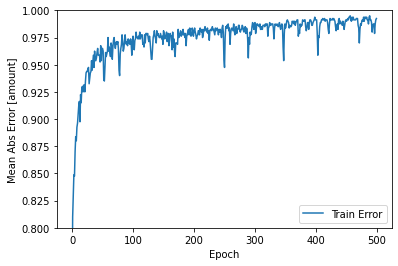

In [63]:
plot_history(history)

In [64]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data)

In [65]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

7/7 - 0s - loss: 4.7213 - accuracy: 0.7400 - 90ms/epoch - 13ms/step

Test accuracy: 0.7400000095367432


In [66]:
shap.initjs() #初始化JS
explainer = shap.KernelExplainer(model,train_data.iloc[0:10])
shap_values = explainer.shap_values(train_data, nsamples=100)

  0%|          | 0/800 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC(

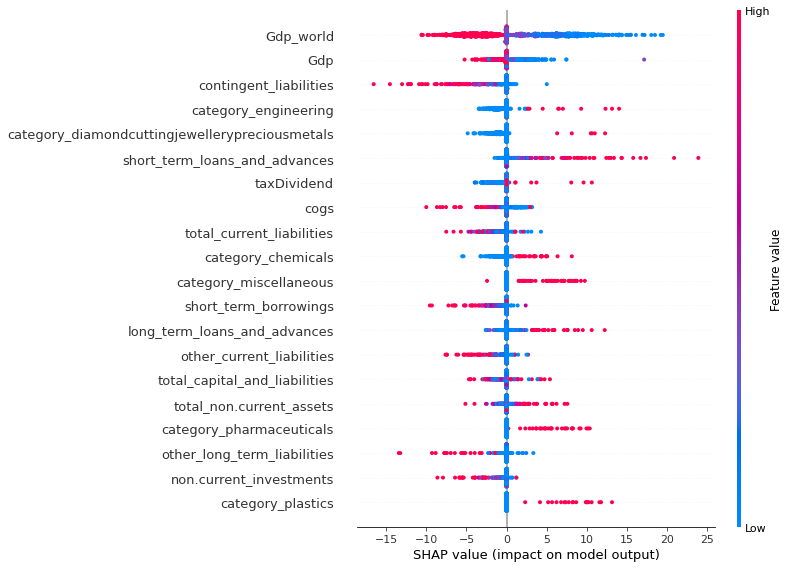

In [67]:
shap.summary_plot(shap_values[0], train_data)

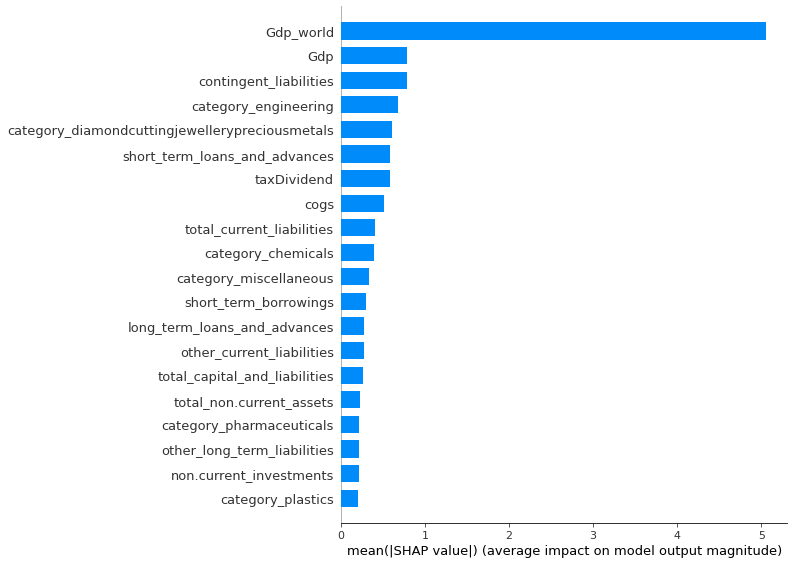

In [68]:
shap.summary_plot(shap_values[0], train_data, plot_type="bar")

In [69]:
train_data.drop(['Gdp_world','Gdp'], axis = 1,inplace=True)
test_data.drop(['Gdp_world','Gdp'], axis = 1,inplace=True)

In [70]:
model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_data.keys())]),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(2)
    ])

In [71]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=32 ,epochs=500)

Epoch 1/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.6550
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.6913
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 0.5618 - accuracy: 0.7225
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.7575
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7788
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.8037
Epoch 7/500
25/25 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.7875
Epoch 8/500
25/25 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8225
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8350
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 0.3429 - accuracy: 0.8438
Epoch 11/

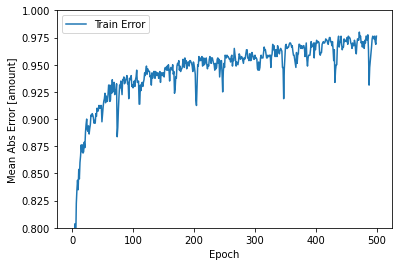

In [72]:
plot_history(history)

In [73]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data)

In [74]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

7/7 - 0s - loss: 4.2053 - accuracy: 0.6450 - 88ms/epoch - 13ms/step

Test accuracy: 0.6449999809265137


In [75]:
shap.initjs() #初始化JS
explainer = shap.KernelExplainer(model,train_data.iloc[0:10])
shap_values = explainer.shap_values(train_data, nsamples=100)

  0%|          | 0/800 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC(

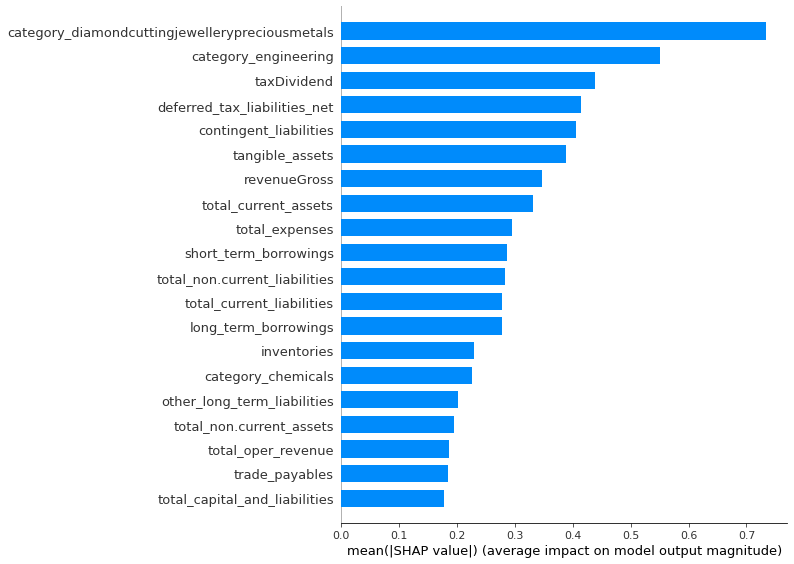

In [76]:
shap.summary_plot(shap_values[0], train_data, plot_type="bar")